In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## Load the dataset

In [4]:
train_data = pd.read_csv("train_data.txt", sep=":::", engine="python", names=["ID", "Title", "Genre", "Description"])
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train_data.info

<bound method DataFrame.info of           ID                                         Title          Genre  \
0          1                 Oscar et la dame rose (2009)          drama    
1          2                                 Cupid (1997)       thriller    
2          3             Young, Wild and Wonderful (1980)          adult    
3          4                        The Secret Sin (1915)          drama    
4          5                       The Unrecovered (2007)          drama    
...      ...                                           ...            ...   
54209  54210                              "Bonino" (1953)         comedy    
54210  54211                  Dead Girls Don't Cry (????)         horror    
54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212  54213                     Make Your Own Bed (1944)         comedy    
54213  54214   Nature's Fury: Storm of the Century (2006)        history    

                                           

In [6]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [7]:
train_data.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [8]:
test_data = pd.read_csv("test_data.txt", sep=":::", engine="python", names=["ID", "Title", "Genre", "Description"])
test_data.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [9]:
test_data.info

<bound method DataFrame.info of           ID                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                                   Genre  Description  
0       L.R. Brane loves his life - his car, his apar...          NaN  
1       Spain, March 1964: Quico is a very naughty ch...          NaN  
2       One year in the life of Albin and his family ...          NaN  
3       His father has died, he hasn't spoken with hi...          NaN  
4      

In [10]:
test_data.describe()

,ID,Description
count,54200.000000,0.0
mean,27100.500000,NaN
std,15646.336632,NaN
min,1.000000,NaN
25%,13550.750000,NaN
50%,27100.500000,NaN
75%,40650.250000,NaN
max,54200.000000,NaN


In [11]:
test_data.isnull().sum()

ID                 0
Title              0
Genre              0
Description    54200
dtype: int64

In [12]:
# dropping off unnecessary columns

train_data=train_data.drop(['ID'],axis=1)
test_data=test_data.drop(['ID'],axis=1)

In [13]:
train_data.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [14]:
test_data.head()

,Title,Genre,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


## Feature Creation

In [16]:
train_data['Title'][0].split('(')[-1][:4]

'2009'

In [17]:
train_data['Title'][0].split('(')[:-1][0]

' Oscar et la dame rose '

In [18]:
## Extracting Year from Movie Titles
def extract_year(data):
    if data.split('(')[-1][:4].isdigit():
        return int(data.split('(')[-1][:4])
    return None

train_data['year']=train_data['Title'].apply(extract_year)
test_data['year']=test_data['Title'].apply(extract_year)

In [19]:
## Cleaning Movie Titles by Removing Year
def transform_title(data):
    if data.split('(')[-1][:4].isdigit():
        return data.split('(')[:-1][0]
    return None

train_data['Title']=train_data['Title'].apply(transform_title)
test_data['Title']=test_data['Title'].apply(transform_title)

In [20]:
train_data.head()

,Title,Genre,Description,year
0,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009.0
1,Cupid,thriller,A brother and sister with a past incestuous r...,1997.0
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980.0
3,The Secret Sin,drama,To help their unemployed father make ends mee...,1915.0
4,The Unrecovered,drama,The film's title refers not only to the un-re...,2007.0


In [21]:
test_data.head()

,Title,Genre,Description,year
0,Edgar's Lunch,"L.R. Brane loves his life - his car, his apar...",NaN,1998.0
1,La guerra de papá,"Spain, March 1964: Quico is a very naughty ch...",NaN,1977.0
2,Off the Beaten Track,One year in the life of Albin and his family ...,NaN,2010.0
3,Meu Amigo Hindu,"His father has died, he hasn't spoken with hi...",NaN,2015.0
4,Er nu zhai,Before he was known internationally as a mart...,NaN,1955.0


### Missing Values

In [23]:
missing_val=train_data.isna().sum()['year']
total_val=train_data.shape[0]
print(f'"Year" Column on train dataset got {(missing_val/total_val)*100} percent missing values.')

"Year" Column on train dataset got 4.965507064595861 percent missing values.


In [24]:
missing_val=test_data.isna().sum()['year']
total_val=test_data.shape[0]
print(f'"Year" Column on test dataset got {(missing_val/total_val)*100} percent missing values.')

"Year" Column on test dataset got 5.119926199261993 percent missing values.


## EDA (Exploratory Data Analysis) & Visulaizations

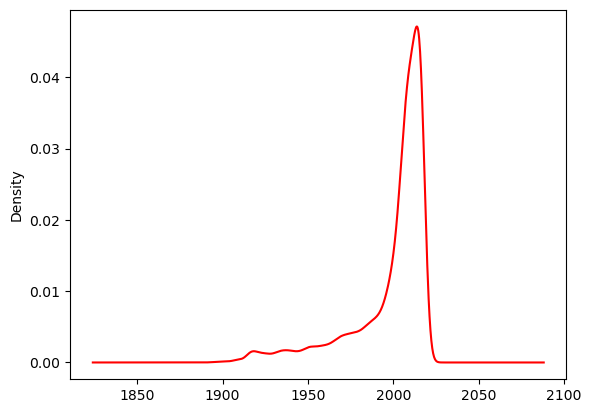

In [26]:
## Visualizing Year Distribution with KDE Plot
train_data['year'].plot(kind='kde',color='red')
plt.show()

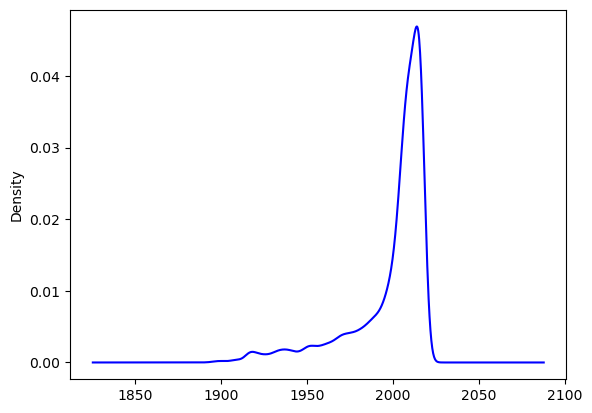

In [27]:
test_data['year'].plot(kind='kde',color='blue')
plt.show()

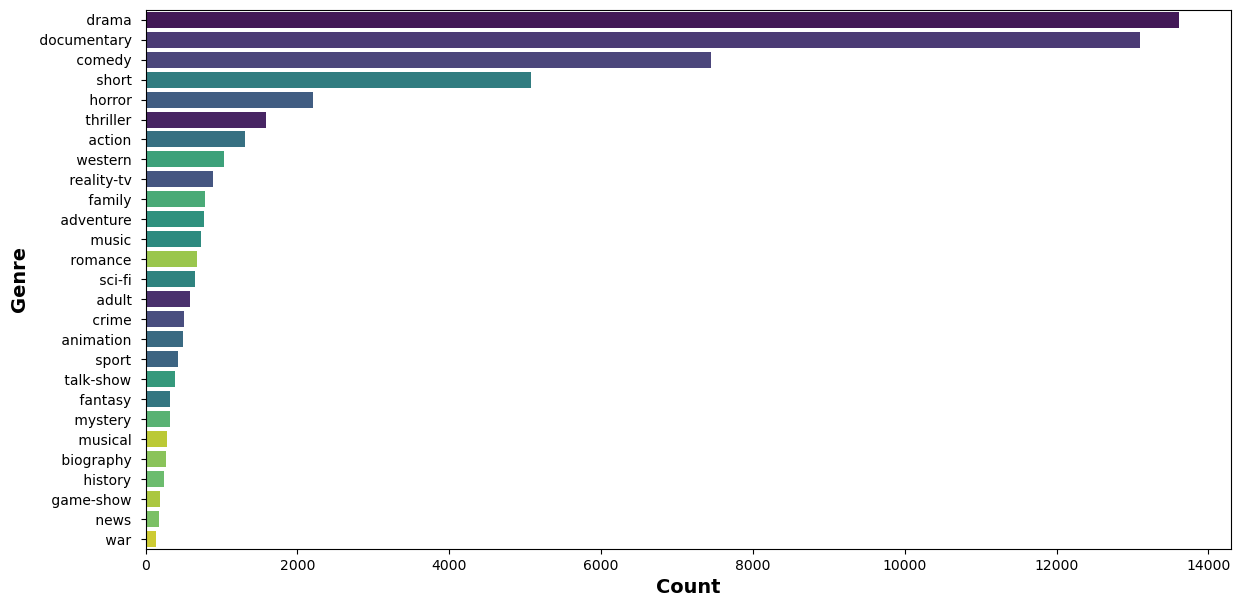

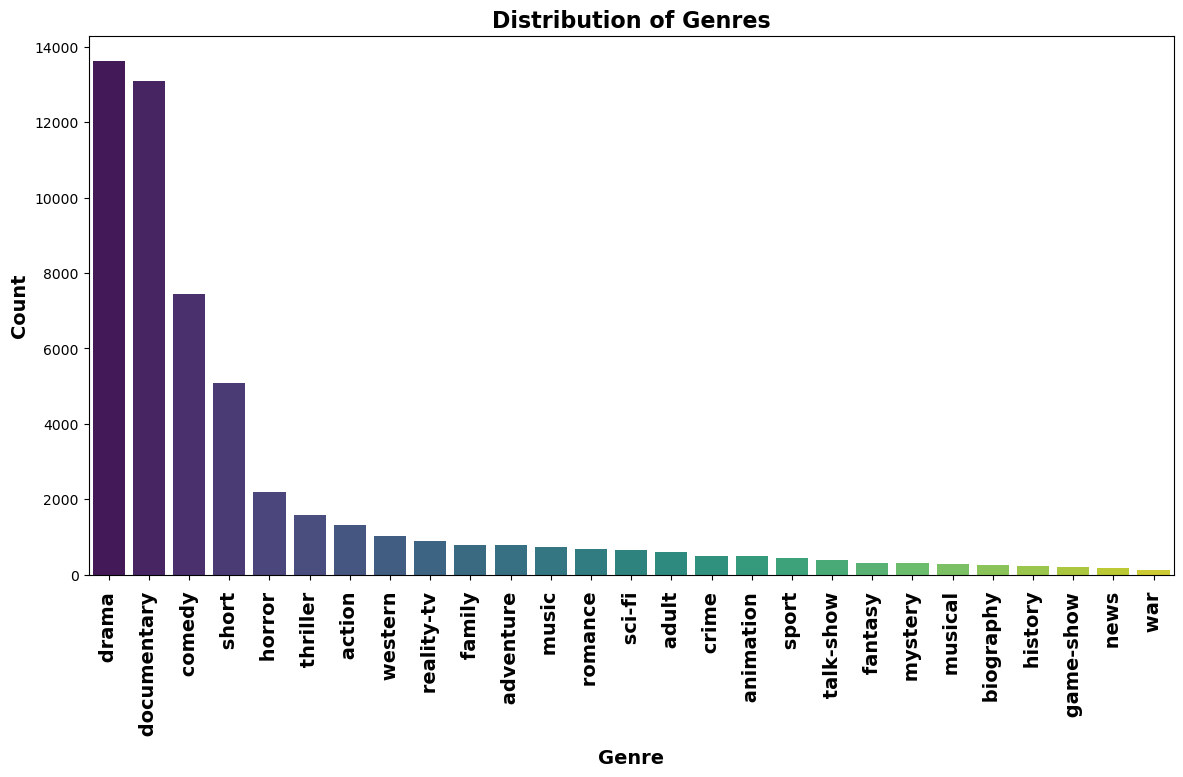

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, hue='Genre', palette='viridis', legend=False)
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, hue=counts.index, palette='viridis', legend=False)
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

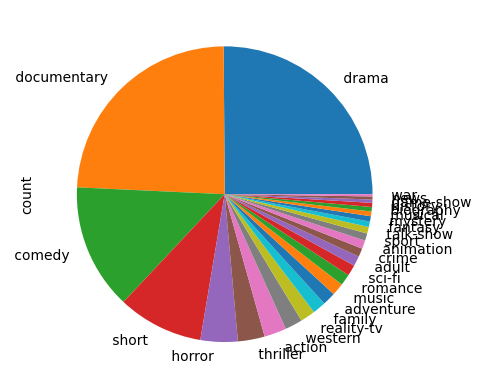

In [29]:
train_data['Genre'].value_counts().plot(kind='pie')
plt.show()

In [30]:
# making x_train & y_train and x_test & y_test

x_train=train_data.drop('Genre',axis=1)
y_train=train_data['Genre']

x_test=test_data.drop('Genre',axis=1)
y_test=test_data['Genre']

In [31]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# for imputing missing values
tran_imputing_na_101 = ColumnTransformer(
    [("fill_na", SimpleImputer(missing_values=np.nan, strategy='mean'), [-1])],remainder='passthrough')

# put bins on year column
tran_binning_102 = ColumnTransformer(
    [("binning_year", KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile'), [0])],remainder='passthrough')

pipeline_101 = Pipeline([('Imputing_values',tran_imputing_na_101),('Binning',tran_binning_102)])

In [32]:
x_train=pipeline_101.fit_transform(x_train)
x_test=pipeline_101.fit_transform(x_test)

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class merge(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,data,y=None):
        return self
    def transform(self,data,y=None):
        #data=np.array(data)
        for i in range(data.shape[0]):
            one_cell=''
            for individual in data[i]:
                one_cell += str(individual)
            data[i]=one_cell
        return data[:,:1].flatten()


# merging all the individual columns and making them one
pipeline_201 = Pipeline([('merging_columns_into_single',merge())])

In [34]:
x_train=pipeline_201.fit_transform(x_train)
x_test=pipeline_201.fit_transform(x_test)

In [35]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [36]:
!pip uninstall -y spacy
!pip install spacy
!python -m spacy download en_core_web_sm

Found existing installation: spacy 3.8.4
Uninstalling spacy-3.8.4:
  Successfully uninstalled spacy-3.8.4
  Using cached spacy-3.8.4-cp312-cp312-win_amd64.whl.metadata (27 kB)
Using cached spacy-3.8.4-cp312-cp312-win_amd64.whl (11.8 MB)
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 762.0 kB/s eta 0:00:17
     -- ------------------------------------ 0.8/12.8 MB 859.5 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 914.5 kB/s eta 0:00:13
     --- ----------------------------------- 1.3/12.8 MB 958.5 kB/s eta 0:00:12
     ---- ----------------------------------- 1.6/12.8 MB 1.0 MB/s eta 0:00:12
     ----- ---------------------------------- 1.8/12.8 MB 1.0 MB/s eta 0:00:

In [37]:
import spacy
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class text_processing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, data, y=None):
        return self
    def transform(self, data, y=None):
        for i in range(data.shape[0]):
            filter_token = ''
            for token in nlp(data[i]):
                if not token.is_punct and not token.is_stop:
                    filter_token += (token.lower_ + ' ')
            data[i] = filter_token.strip()  # Strip extra spaces
        return data

nlp = spacy.load('en_core_web_sm')  # Load Spacy model

# Implementing text processing pipeline
pipeline_301 = Pipeline([('text_processing', text_processing())])

In [38]:
x_train=pipeline_301.fit_transform(x_train)
x_test=pipeline_301.transform(x_test)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline_401 = Pipeline([('tf_idf_vector', TfidfVectorizer())])

In [40]:
x_train=pipeline_401.fit_transform(x_train)
x_test=pipeline_401.transform(x_test)

In [41]:
from scipy import sparse

x_train = sparse.csr_matrix(x_train)
x_test = sparse.csr_matrix(x_test)

In [42]:
# Performing Label Encoding on Output Column

label_encoder=LabelEncoder()

y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

## Implementing the Models

In [44]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

clf = BernoulliNB(alpha=2,fit_prior=False,binarize=0.019).fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

1.845018450184502e-05

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=230, weights='distance').fit(x_train, y_train)
y_pred = neigh.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.0


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=195, random_state=42).fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.845018450184502e-05


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(multi_class='multinomial', solver='saga').fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.845018450184502e-05
